# Create topography and save it in directory INPUT/ as a nc file
 - Used to run MOM6 as one of the initial conditions.
 - Topography is independent of type of vertical coordinate.


For the model, specify the following in the MOM_input file:

TOPO_CONFIG = "file"             !   \
TOPO_FILE = "topog.nc"           ! default = "topog.nc"\
                                 ! The file from which the bathymetry is read.\
TOPO_VARNAME = "depth"           ! default = "depth" \
                                 ! The name of the bathymetry variable in TOPO_FILE.

In [27]:
clear
homedir = getenv('HOME');
workdir = getenv('WORK');
scradir = getenv('SCRATCH');
addpath(genpath([homedir '/work_MOM']));
addpath(genpath([homedir '/mytoolbox']));
addpath(genpath([homedir '/MyFuncs']));

In [28]:
% create a grid on which the topo is defined: either read from data or create on your own
% % 1. read from data
% grid_dir = [scradir '/subme_model/'];  
% [grid, ~, ~] = read_grid_MOM([grid_dir '']); 
% ds_IC = ncstruct([grid_dir '/Initial_state.nc']);

% 2. create
% delda_m = 200; % m
% [nih,njh] = deal(100,50); %2000x1000
% xlim = [0 delda_m*nih/1e3]; % km
% ylim = [0 delda_m*njh/1e3];
delda_m = 2000; % [m] grid spacing
xlim = [0 400]; % km
ylim = [0 200];
[nih, njh] = deal((xlim(2)-xlim(1))*1e3/delda_m, (ylim(2)-ylim(1))*1e3/delda_m)

grid = build_grid_MOM(nih,njh,xlim,ylim);


nih =

   200


njh =

   100



## create topography, with a submerged ridge 
see https://zenodo.org/records/8002828 or https://agupubs.onlinelibrary.wiley.com/doi/10.1029/2023MS003886


ans =

       80000



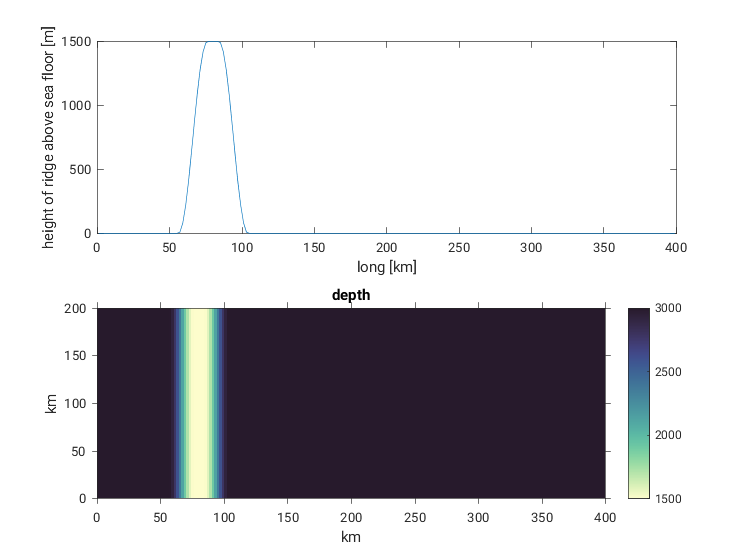

In [29]:
% parameters
Lx = (xlim(end) - xlim(1))*1e3; % [m]
oce_depth = 3000; % [m] ocean depth
ridge_H = 1500;    % height of ridge [m]
% ---- the following two params are dependent on domain size
ridge_L = 20*1e3;   % half width of ridge [m]
delta_ridge = 4*1e3; % half width of the top face of ridge (shall be less than ridge_L) [m]
doridge = 1;

% ----
[x, y] = deal(grid.lonh, grid.lath);
x_meter = x*1e3;
[nx, ny] = deal(length(x), length(y));
depth = zeros(nx,ny);

% 
ridge_x1d = zeros(nx,1);
ratio = 5; % center of ridge is at 1/ratio of the domain (from west bndry)
Lx / ratio
for i = 1:nx
    if (x_meter(i) > -ridge_L - delta_ridge + Lx / ratio) & (x_meter(i) < -delta_ridge + Lx / ratio) 
        ridge_x1d(i) = 0.5 * ridge_H * (1.0 + cos(pi * (x_meter(i) + Lx / ratio + delta_ridge) / ridge_L));
    elseif (x_meter(i) > delta_ridge + Lx / ratio) & (x_meter(i) < ridge_L + delta_ridge + Lx / ratio)
        ridge_x1d(i) = 0.5 * ridge_H * (1.0 + cos(pi * (x_meter(i) + Lx / ratio - delta_ridge) / ridge_L));
    elseif (x_meter(i) >= -delta_ridge + Lx / ratio) & (x_meter(i) <= delta_ridge + Lx / ratio) % top face of ridge
        ridge_x1d(i) = ridge_H;
    end
end

% transfer to 2d depth [m]
if doridge
    depth = oce_depth - repmat(ridge_x1d, [1 njh]);
else
    depth = oce_depth*ones(nx,ny);
end

% ------ plot
figure
subplot(211)
plot(x,ridge_x1d)
xlabel('long [km]')
ylabel('height of ridge above sea floor [m]')

subplot(212)
imagescn(x, y, depth'); 
% axis square;
set(gca,'tickdir','out');
cmocean('deep'); colorbar;
xlabel('km')
ylabel('km')
title('depth')
set(gcf,'PaperPositionMode','auto'); 


## save the topo

In [31]:

savefnm = 'INPUT_2km_x400kmy200km/topog.nc';
ncbuild(savefnm, x, 'dimnames', {'xh'}, ...
    'varatts', {'long_name', 'longitude at cell centers', 'units', 'km'});
ncbuild(savefnm, y, 'dimnames', {'yh'}, ...
    'varatts', {'long_name', 'latitude at cell centers', 'units', 'km'});
ncbuild(savefnm, depth, 'name', 'depth', 'dimnames', {'xh','yh'}, ...
    'varatts', {'long_name', 'topographic depth at cell centers', 'units', 'meters'});
    
ncdisp(savefnm)

Source:
           /glade/u/home/yueyanglu/work_mlmodel/INPUT_2km_x400kmy200km/topog.nc
Format:
           classic
Dimensions:
           xh = 200
           yh = 100
Variables:
    x    
           Size:       200x1
           Dimensions: xh
           Datatype:   double
           Attributes:
                       long_name = 'longitude at cell centers'
                       units     = 'km'
    y    
           Size:       100x1
           Dimensions: yh
           Datatype:   double
           Attributes:
                       long_name = 'latitude at cell centers'
                       units     = 'km'
    depth
           Size:       200x100
           Dimensions: xh,yh
           Datatype:   double
           Attributes:
                       long_name = 'topographic depth at cell centers'
                       units     = 'meters'


In [12]:
depth_al(:,22)


ans =

   1.0e+03 *

         0
         0
         0
         0
    3.0000
    3.0000
    3.0000
    3.0000
    3.0000
    3.0000
    3.0000
    3.0000
    3.0000
    3.0000
    3.0000
    3.0000
    3.0000
    3.0000
    3.0000
    3.0000
    3.0000
    3.0000
    3.0000
    3.0000
    3.0000
    3.0000
    3.0000
    3.0000
    3.0000
    3.0000
    3.0000
    3.0000
    3.0000
    3.0000
    3.0000
    3.0000
    3.0000
    3.0000
    3.0000
    3.0000
    3.0000
    3.0000
    3.0000
    3.0000
    3.0000
    3.0000
    3.0000
    3.0000
    3.0000
    3.0000
    2.9764
    2.4818
    1.7719
    1.5000
    1.5000
    1.7719
    2.4818
    2.9764
    3.0000
    3.0000
    3.0000
    3.0000
    3.0000
    3.0000
    3.0000
    3.0000
    3.0000
    3.0000
    3.0000
    3.0000
    3.0000
    3.0000
    3.0000
    3.0000
    3.0000
    3.0000
    3.0000
    3.0000
    3.0000
    3.0000
    3.0000
    3.0000
    3.0000
    3.0000
    3.0000
    3.0000
    3.0000
    3.0000
    3.0000